CNN pre-trained model (binary classification of chosen class)

PREPROCESSING

Training set shape: (50000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)
Total number of labels: 50000
Total number of labels: 10000
Image shape: (32, 32, 3)
Label: 1 (airplane)


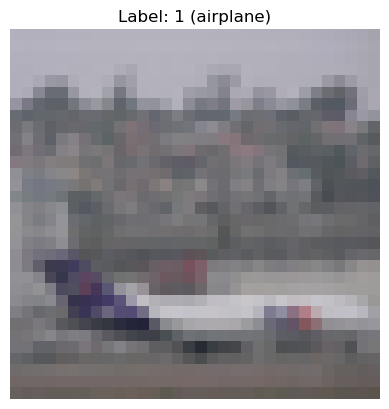

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (CIFAR-10), returns four Numpy arrays
(x_train_img, y_train_label), (x_test_img, y_test_label) = tf.keras.datasets.cifar10.load_data()

all_classes = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

target_feature = 0 # "airplane"

# Convert labels to 0 and 1 for target_feature. If a label == target_features label then it is set to 1, otherwise it is 0
y_train_label = (y_train_label == target_feature).astype("int")
y_test_label = (y_test_label == target_feature).astype("int")

# Normalize pixel values to be between 0 and 1 (usually something that should be done, but there are alternatives)
x_train_img = x_train_img / 255.0
x_test_img = x_test_img / 255.0

# Shape (number of images (samples), height of image, width if image, RGB (e.g number of channels, greyscale has 1 channel))
print(f"Training set shape: {x_train_img.shape}") # (50000, 32, 32, 3)
print(f"Testing set shape: {x_test_img.shape}") # (10000, 32, 32, 3)

# Total number of labels (50 000 number of images above and 50 000 labels here)
print(f"Total number of labels: {len(y_train_label)}")
print(f"Total number of labels: {len(y_test_label)}")

# Print shape and label of first image (image and label must match), and then display the image
image = x_train_img[30000]
label = y_train_label[30000][0] # y_train_label[0] is a 2D array, [0][0] will access the label

print(f"Image shape: {image.shape}") # shape of the image (which also is the three last numbers in x_train_img.shape)
print(f"Label: {label} ({'airplane' if label == 1 else 'not airplane'})")

plt.imshow(image)
plt.title(f"Label: {label} ({'airplane' if label == 1 else 'not airplane'})")
plt.axis("off")
plt.show()

THE MODEL

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 128ms/step - accuracy: 0.9141 - loss: 0.2239 - val_accuracy: 0.9313 - val_loss: 0.1780
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 129ms/step - accuracy: 0.9359 - loss: 0.1711 - val_accuracy: 0.9359 - val_loss: 0.1643
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 216s 138ms/step - accuracy: 0.9378 - loss: 0.1654 - val_accuracy: 0.9389 - val_loss: 0.1619
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


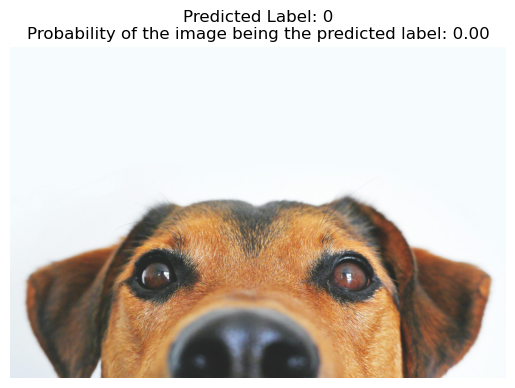

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


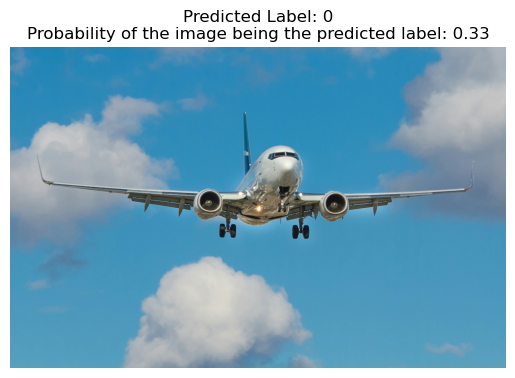

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


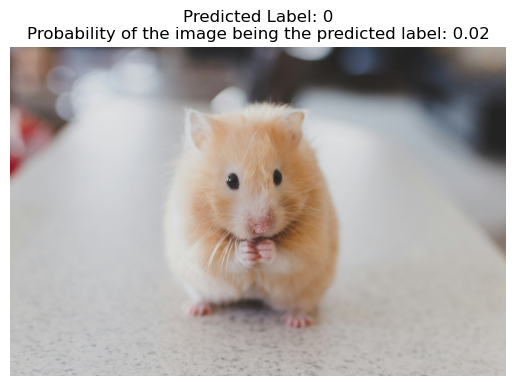

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


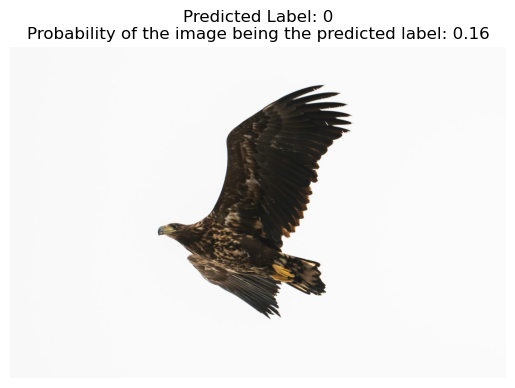

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


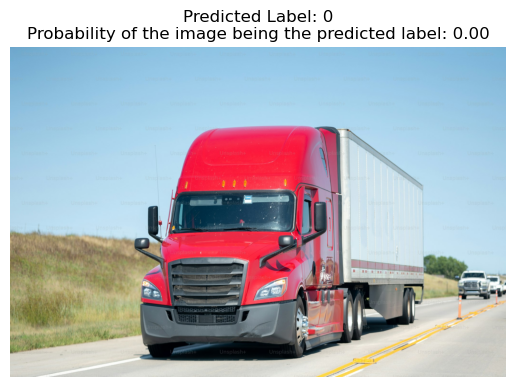

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


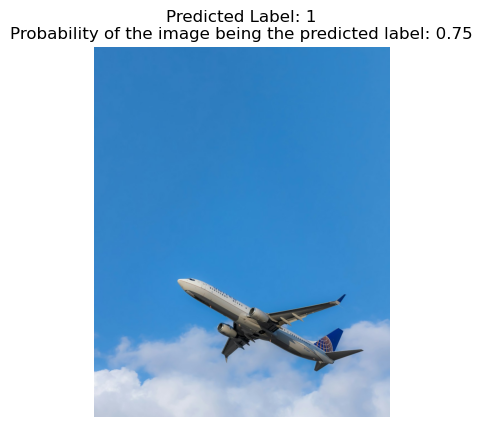

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,813,381 (56.51 MB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 65,796 (257.02 KB)

None


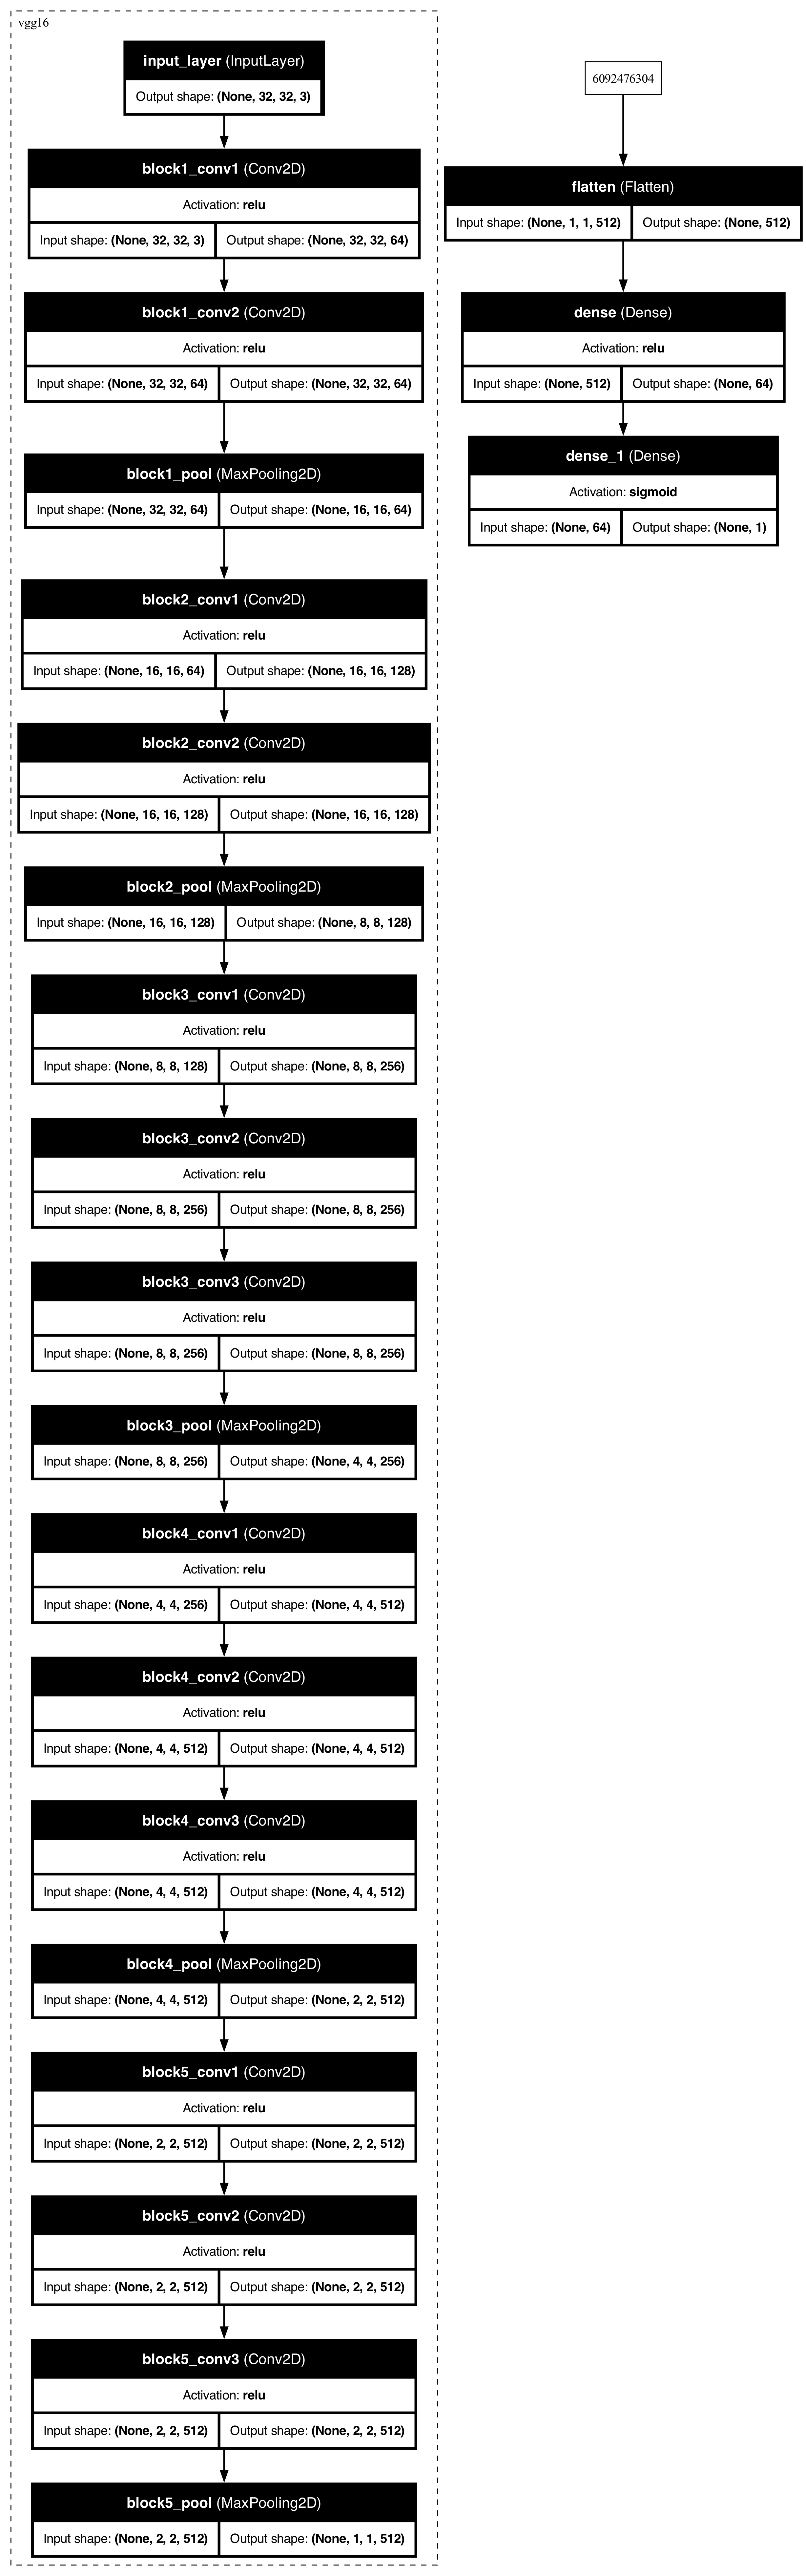

In [2]:
import requests
from PIL import Image
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Use the VGG16 model with pre-trained ImageNet weights
# Exclude the top layers (the fully connected layers) for transfer learning
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model) # Add VGG16 model (pre-trained)
model.add(layers.Flatten()) # Flatten the output
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    x_train_img, y_train_label,
    epochs=3, 
    validation_data=(x_test_img, y_test_label),
    )

# Function to handle external image from URL
def external_image(img_url):
    img = Image.open(requests.get(img_url, stream=True).raw) # open image from URL
    img = img.resize((32, 32)) # resize to correct image size
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0) # Add batch (which means the image becomes a 4D array with shape (1, 32, 32, 3))
    return img

# Predict labels for the test set
predicted_labels_test_set = model.predict(x_test_img)
predicted_labels_test_set = [1 if prediction[0] > 0.5 else 0 for prediction in predicted_labels_test_set]

image_urls = [
    # picture of a dog
    "https://images.pexels.com/photos/406014/pexels-photo-406014.jpeg",
    # picture of an airplane
    "https://images.unsplash.com/photo-1569629743817-70d8db6c323b?q=80&w=2098&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
    # picture of a hamster
    "https://images.unsplash.com/photo-1425082661705-1834bfd09dca?q=80&w=2076&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
    # picture of an eagle
    "https://images.unsplash.com/photo-1740214845705-04a20e2e22c1?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
    # picture of a truck
    "https://plus.unsplash.com/premium_photo-1664695368767-c42483a0bda1?q=80&w=2072&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
    # picture of an airplane
    "https://images.unsplash.com/photo-1559268950-2d7ceb2efa3a?q=80&w=1064&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
]

# Predict labels for external URLs
predicted_labels = [] # stores predictions for external images

for image_url in image_urls:
    test_img = external_image(image_url)
    prediction = model.predict(test_img)

    # Convert probability to class label
    predicted_label = 1 if prediction[0][0] > 0.5 else 0
    predicted_labels.append(predicted_label)

    # Display the image
    img = Image.open(requests.get(image_url, stream=True).raw)
    plt.imshow(img)
    plt.title(f"Predicted Label: {predicted_label}\nProbability of the image being the predicted label: {prediction[0][0]:.2f}")
    plt.axis('off')
    plt.show()

# Plot of architecture + summary
print(model.summary())
plot_model(model,
           show_shapes=True,
           show_layer_names=True,
           show_layer_activations=True,
           expand_nested=True)

EVALUATION OF THE MODEL

Accuracy: Model predicts y_test_label: 0.94
Accuracy: Model predicts external image labels: 0.83
Difference in accuracy: 0.10556666666666659 



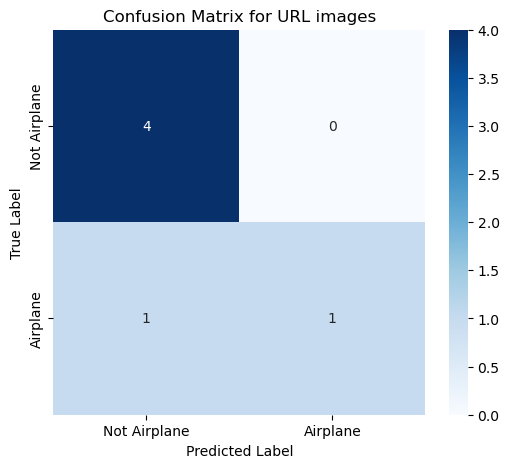

Classification report (external URLs):
               precision    recall  f1-score   support

Not Airplane       0.80      1.00      0.89         4
    Airplane       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



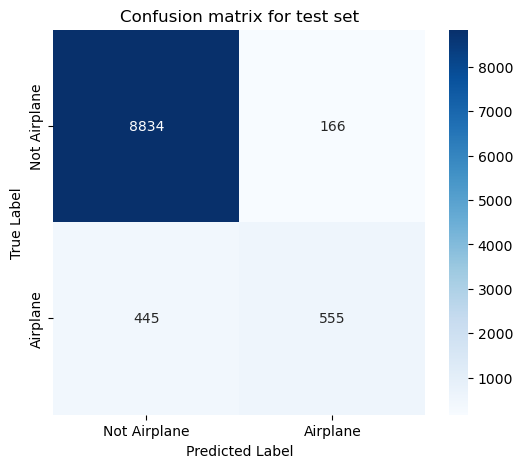

Classification report (test set):
               precision    recall  f1-score   support

Not Airplane       0.95      0.98      0.97      9000
    Airplane       0.77      0.56      0.64      1000

    accuracy                           0.94     10000
   macro avg       0.86      0.77      0.81     10000
weighted avg       0.93      0.94      0.93     10000



In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Setting labels for external Images
# 0: "Not Airplane", 1: "Airplane", 2: "Not Airplane", 3: "Not Airplane", 4: "Not Airplane", 5: "Airplane"
actual_labels = [0, 1, 0, 0, 0, 1]

# Accuracy (external URLs + test set)
accuracy_test_set = accuracy_score(y_test_label, predicted_labels_test_set)
accuracy_external = accuracy_score(actual_labels, predicted_labels)

print(f"Accuracy: Model predicts y_test_label: {accuracy_test_set:.2f}")
print(f"Accuracy: Model predicts external image labels: {accuracy_external:.2f}")
print("Difference in accuracy:", accuracy_test_set - accuracy_external, "\n")

# Confusion matrix (external images)
confusion = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Airplane", "Airplane"], yticklabels=["Not Airplane", "Airplane"])
plt.title("Confusion Matrix for URL images")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report (external images)
print("Classification report (external URLs):\n", classification_report(actual_labels, predicted_labels, target_names=["Not Airplane", "Airplane"]))

# Confusion Matrix (test set)
confusion = confusion_matrix(y_test_label, predicted_labels_test_set)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Airplane", "Airplane"], yticklabels=["Not Airplane", "Airplane"])
plt.title("Confusion matrix for test set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report (test set)
print("Classification report (test set):\n", classification_report(y_test_label, predicted_labels_test_set, target_names=["Not Airplane", "Airplane"]))